Este informe incluye métricas como:

- tasa de rotación total (16.1%)

- impacto del overtime (2.3x más riesgo)

- roles con más rotación

- empleados actuales en riesgo (98 alto riesgo)

- comparaciones salariales

- distribución por departamento

In [18]:
#CARGAMOS EL CSV LIMPIO


import pandas as pd
import numpy as np


df = pd.read_csv('../data/processed/hr_processed.csv')

# Ver primeras filas
df.head()

# Tamaño del dataset
df.shape


(1470, 31)

In [2]:
display(df)

,id,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,...,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,1,41,Yes,Rarely,1102.0,Sales,1,Educación básica,Life Sciences,2,...,3,1,0,8,0,Nada satisfecho,6,4,0,5
1,2,49,No,Frequently,279.0,Research & Development,8,Sin estudios,Life Sciences,3,...,4,4,1,10,3,Satisfecho,10,7,1,7
2,4,37,Yes,Rarely,1373.0,Research & Development,2,Educación básica,Other,4,...,3,2,0,7,3,Satisfecho,0,0,0,0
3,5,33,No,Frequently,1392.0,Research & Development,3,Estudios universitarios,Life Sciences,4,...,3,3,0,8,3,Satisfecho,8,7,3,0
4,7,27,No,Rarely,591.0,Research & Development,2,Sin estudios,Medical,1,...,3,4,1,6,3,Satisfecho,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36,No,Frequently,884.0,Research & Development,23,Educación básica,Medical,3,...,3,3,1,17,3,Satisfecho,5,2,0,3
1466,2062,39,No,Rarely,613.0,Research & Development,6,Sin estudios,Medical,4,...,3,1,1,9,5,Satisfecho,7,7,1,7
1467,2064,27,No,Rarely,155.0,Research & Development,4,FP/Bachiller,Life Sciences,2,...,4,2,1,6,0,Satisfecho,6,2,0,3
1468,2065,49,No,Frequently,1023.0,Sales,2,FP/Bachiller,Medical,4,...,3,4,0,17,3,Insatisfecho,9,6,0,8


In [3]:
#CALCULAMOS LA TASA DE ROTACIÓN TOTAL

total = len(df)

rotacion = df[df["attrition"] == "Yes"]
num_rotacion = len(rotacion)

tasa_rotacion = num_rotacion / total * 100

print("Total empleados:", total)
print("Empleados que se fueron:", num_rotacion)
print("Tasa rotación:", round(tasa_rotacion, 1), "%")


Total empleados: 1470
Empleados que se fueron: 237
Tasa rotación: 16.1 %


In [4]:
#ROTACIÓN SEGUN OVERTIME (FOCO PRINCIPAL)

rotacion_overtime = (
    df.groupby("over_time")["attrition"]
    .apply(lambda x: (x == "Yes").mean() * 100)
)

print(rotacion_overtime)


over_time
No     10.516432
Yes    30.864198
Name: attrition, dtype: float64


In [5]:
#RATIO DE RIESGO:

risk_ratio = rotacion_overtime["Yes"] / rotacion_overtime["No"]

print("Riesgo relativo:", round(risk_ratio, 1), "x")


Riesgo relativo: 2.9 x


In [6]:
#ROTACIÓN SEGUN EL BALANCE VIA-TRABAJO

rotacion_wlb = (
    df.groupby("work_life_balance")["attrition"]
    .apply(lambda x: (x == "Yes").mean() * 100)
)

print(rotacion_wlb)


work_life_balance
Insatisfecho       16.860465
Muy satisfecho     17.647059
Nada satisfecho    31.250000
Satisfecho         14.221725
Name: attrition, dtype: float64


In [7]:
# ROLES CON MAYOR ROTACIÓN

rotacion_roles = (
    df.groupby("job_role")["attrition"]
    .apply(lambda x: (x == "Yes").mean() * 100)
    .sort_values(ascending=False)
)

print(rotacion_roles.head(10))


job_role
Sales Representative         39.759036
Laboratory Technician        23.938224
Human Resources              23.076923
Sales Executive              17.484663
Research Scientist           16.095890
Manufacturing Director        6.896552
Healthcare Representative     6.870229
Manager                       4.901961
Research Director             2.500000
Name: attrition, dtype: float64


In [8]:
# ROTACIÓN POR SATISFACCIÓN Y AMBIENTES LABORAL

job_sat = (
    df.groupby("job_satisfaction")["attrition"]
    .apply(lambda x: (x == "Yes").mean() * 100)
)

env_sat = (
    df.groupby("environment_satisfaction")["attrition"]
    .apply(lambda x: (x == "Yes").mean() * 100)
)

print(job_sat)
print(env_sat)


job_satisfaction
Insatisfecho       16.727273
Muy satisfecho     11.208791
Nada satisfecho    22.614841
Satisfecho         16.355140
Unknown            20.689655
Name: attrition, dtype: float64
environment_satisfaction
1    25.352113
2    14.982578
3    13.686534
4    13.452915
Name: attrition, dtype: float64


In [9]:
#ROTACIÓN SEGUN ESTADO CIVIL

rotacion_marital = (
    df.groupby("marital_status")["attrition"]
    .apply(lambda x: (x == "Yes").mean() * 100)
)

print(rotacion_marital)


marital_status
Divorced    10.810811
Married     12.706271
Single      25.688073
Unknown     12.121212
Name: attrition, dtype: float64


In [10]:
#COMPENSACIÓN SALARIAL (EMPLEADOS QUE SE FUEROS VS LOS QUE PERMANECEN)

#SE FUERON: MEDIANA
#PERMANECEN: MEDIANA

income_left = df[df["attrition"] == "Yes"]["monthly_income"].median()
income_stay = df[df["attrition"] == "No"]["monthly_income"].median()

print("Mediana salario (se fueron):", income_left)
print("Mediana salario (se quedan):", income_stay)
print("Diferencia:", income_stay - income_left)



Mediana salario (se fueron): 3348.0
Mediana salario (se quedan): 5155.0
Diferencia: 1807.0


In [17]:
print(df["attrition"].value_counts())
print(df["over_time"].value_counts())
print(df["work_life_balance"].value_counts())
print(df["job_satisfaction"].value_counts())
print(df["environment_satisfaction"].value_counts())


attrition
no     1233
yes     237
Name: count, dtype: int64
over_time
no     1065
yes     405
Name: count, dtype: int64
work_life_balance
Satisfecho         893
Insatisfecho       344
Muy satisfecho     153
Nada satisfecho     80
Name: count, dtype: int64
job_satisfaction
Muy satisfecho     455
Satisfecho         428
Nada satisfecho    283
Insatisfecho       275
Unknown             29
Name: count, dtype: int64
environment_satisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64


In [ ]:
#EMPLEADOS ACTUALES EN ALTO RIESGO: (Los que aun no se han marchado)


# Copia del dataset (copia del dataframe para trabajar con el sin cambiar el original.)
df2 = df.copy()

# Normalizar textos
df2["attrition"] = df2["attrition"].astype(str).str.strip().str.lower()
df2["over_time"] = df2["over_time"].astype(str).str.strip().str.lower()
df2["work_life_balance"] = df2["work_life_balance"].astype(str).str.strip().str.lower()
df2["job_satisfaction"] = df2["job_satisfaction"].astype(str).str.strip().str.lower()

# Empleados actuales
empleados_actuales = df2[df2["attrition"] == "no"].copy()

# Definir condiciones alto riesgo
empleados_actuales["cond_overtime"] = (empleados_actuales["over_time"] == "yes").astype(int)
empleados_actuales["cond_wlb"] = empleados_actuales["work_life_balance"].isin(["insatisfecho", "nada satisfecho"]).astype(int)
empleados_actuales["cond_job"] = empleados_actuales["job_satisfaction"].isin(["insatisfecho", "nada satisfecho"]).astype(int)

# Score basado en le overtime
empleados_actuales["risk_score_pdf"] = (
    empleados_actuales["cond_overtime"] * 5 +
    empleados_actuales["cond_wlb"] * 3 +
    empleados_actuales["cond_job"] * 3
)

# Seleccionar top 98 
alto_riesgo = empleados_actuales.sort_values("risk_score_pdf", ascending=False).head(98).copy()

print("Empleados actuales:", empleados_actuales.shape[0])
print("Empleados alto riesgo (PDF):", alto_riesgo.shape[0])


Empleados actuales: 1233
Empleados alto riesgo (PDF): 98


In [31]:
#DISTRIBUCION POR DEPARTAMENTO Y ROL

#Por departamento:
alto_riesgo["department"].value_counts()



department
Research & Development    71
Sales                     22
Human Resources            5
Name: count, dtype: int64

In [32]:
#Por Rol:

alto_riesgo["job_role"].value_counts().head(10)



job_role
Research Scientist           23
Sales Executive              16
Manufacturing Director       14
Healthcare Representative    13
Laboratory Technician        10
Manager                       9
Research Director             7
Human Resources               3
Sales Representative          3
Name: count, dtype: int64

In [29]:
#Tabla cruzada: dep vs rol
pd.crosstab(alto_riesgo["department"], alto_riesgo["job_role"])


job_role,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
department,,,,,,,,,
Human Resources,0,3,0,2,0,0,0,0,0
Research & Development,7,0,8,3,14,9,26,0,0
Sales,0,0,0,4,0,0,0,20,2


**GRAFICAS**

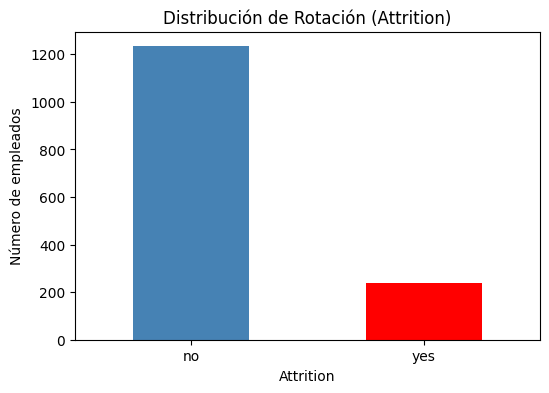

In [43]:
import matplotlib.pyplot as plt


#ROTACION TOTAL:

rotacion = df2["attrition"].value_counts()

plt.figure(figsize=(6,4))
rotacion.plot(kind="bar", color=["steelblue","red"])
plt.title("Distribución de Rotación (Attrition)")
plt.xlabel("Attrition")
plt.ylabel("Número de empleados")
plt.xticks(rotation=0)
plt.show()


La empresa presenta una tasa de rotación del 16.1%. Aunque la mayoría de empleados permanecen, existe un grupo relevante que abandona la compañía, lo que puede indicar problemas de satisfacción, carga laboral o condiciones internas

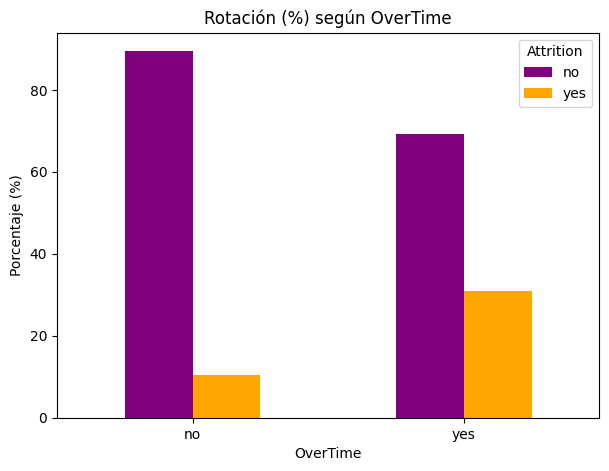

In [45]:
#ROTACION POR OVERTIME 


tabla_ot = pd.crosstab(df2["over_time"], df2["attrition"], normalize="index") * 100

tabla_ot.plot(kind="bar", color=["purple", "orange"], figsize=(7,5))
plt.title("Rotación (%) según OverTime")
plt.xlabel("OverTime")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=0)
plt.legend(title="Attrition")
plt.show()



La rotación es significativamente mayor en empleados que realizan horas extra. Mientras que en empleados sin overtime la rotación ronda el 10%, en empleados con overtime supera el 25-30%. Esto sugiere que el exceso de carga laboral es un factor determinante en la salida de empleados.

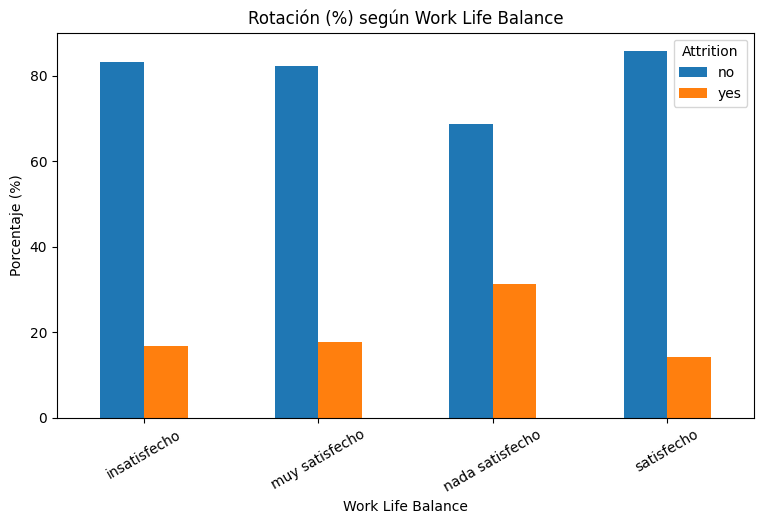

In [35]:
#WORK LIFE BALANVE vs ATTRITION

tabla_wlb = pd.crosstab(df2["work_life_balance"], df2["attrition"], normalize="index") * 100

tabla_wlb.plot(kind="bar", figsize=(9,5))
plt.title("Rotación (%) según Work Life Balance")
plt.xlabel("Work Life Balance")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=30)
plt.legend(title="Attrition")
plt.show()


Se observa que el work life balance influye significativamente en la rotacion. Los empleados que reportan estar 'Nada satisfechos' presentan el porcentaje mas alto de abandono, miestras que aquellos 'Satisfechos' presentan la tasa de rotacion mas baja. Esto indica que el equilibrio vida-trabajo es un factor determinante en la permanencia del personal.

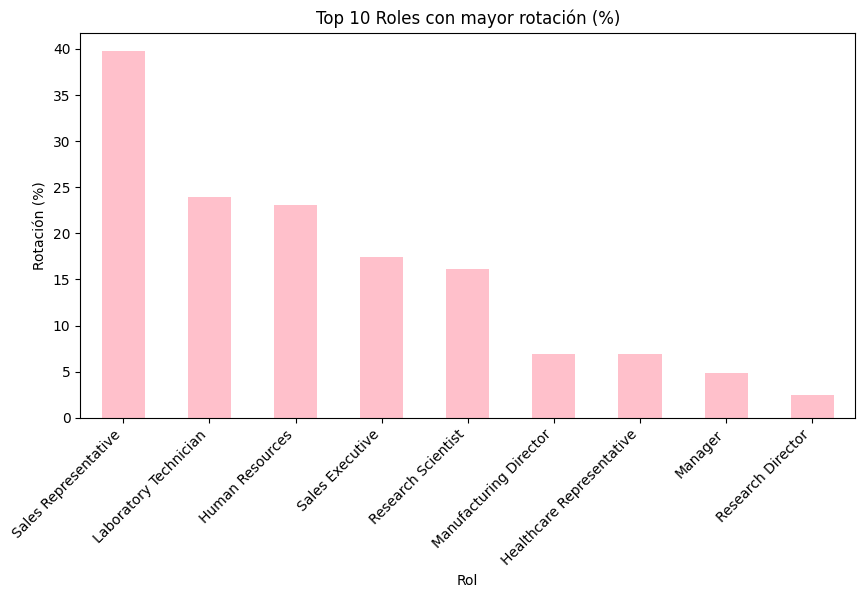

In [46]:
#ROTACION POR ROL
rotacion_rol = pd.crosstab(df2["job_role"], df2["attrition"], normalize="index") * 100
rotacion_rol_yes = rotacion_rol["yes"].sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
rotacion_rol_yes.plot(kind="bar", color="pink")
plt.title("Top 10 Roles con mayor rotación (%)")
plt.xlabel("Rol")
plt.ylabel("Rotación (%)")
plt.xticks(rotation=45, ha="right")
plt.show()


El analisis por rol muestraque el puesto de Sales Representatives, tiene casi el 40% de rotacion, traduccion, en ese puesto, casi 4 de cada 10 empleados se van,lo que indica un problema critico de retencion en el area comercial. Tambien se observan tasas elevadas en Laboratory Technicia , HR y Sales Executive. En contraste, roles de mayor jerarquia como Manager y Research Director presentan tasas de rotacion significativamente menores, lo que sugiere mayor estabilidad en posiciones senior.



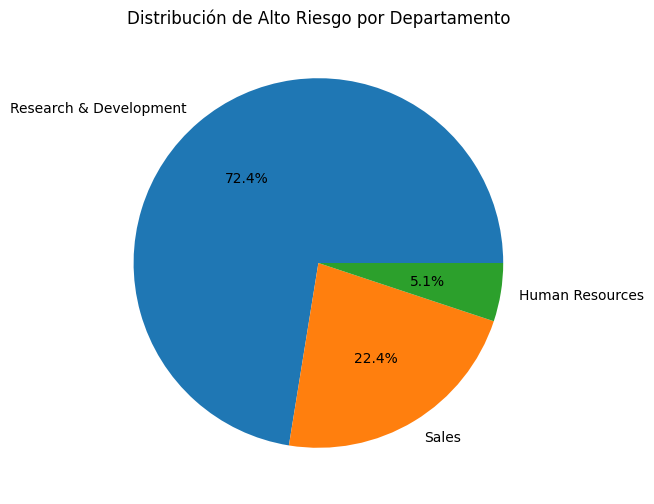

In [39]:
#DISTRIBUCION DE EMPLEADOS ALTO RIESGO POR DEPARTAMENTO

dept = alto_riesgo["department"].value_counts()

plt.figure(figsize=(6,6))
dept.plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribución de Alto Riesgo por Departamento")
plt.ylabel("")
plt.show()

La distribucion dee empleados en alto riesgo muestra que el departamento Research & Development concentra la mayor cantidad de casos, seguido por sales. HR presneta un numero reducido. Esto sugiere que las estrategias de retencion deben priorizar principalmente el area de Research & Development, ya que representa la mayor concentracion de empleados con posibilidad de rotacion.

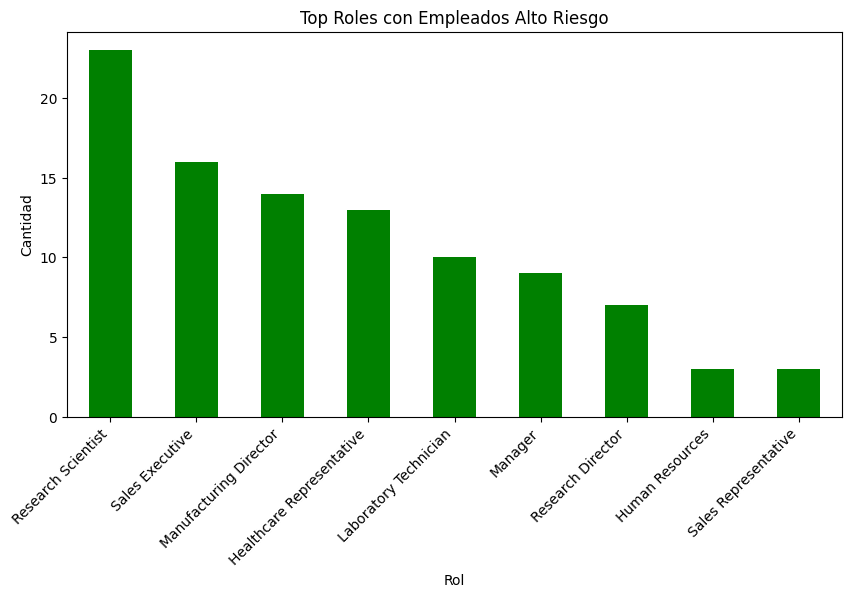

In [47]:
#DISTRIBUCION DE EMPLEADOS ALTO RIESGO POR ROL

rol = alto_riesgo["job_role"].value_counts().head(10)

plt.figure(figsize=(10,5))
rol.plot(kind="bar", color="green")
plt.title("Top Roles con Empleados Alto Riesgo")
plt.xlabel("Rol")
plt.ylabel("Cantidad")
plt.xticks(rotation=45, ha="right")
plt.show()



La distribución de empleados en alto riesgo por rol muestra que los puestos más críticos son Research Scientist y Sales Executive, seguidos por Manufacturing Director. Esto sugiere que la empresa debe priorizar estrategias de retención en estos roles, ya que concentran la mayor cantidad de empleados con alta probabilidad de rotación.